In [13]:
%matplotlib inline

import json
import numpy as np
import matplotlib.pyplot as plt
    
def read_annotation_file(path):
    '''This creates a dictionary where the first key is the sequence id,
    and the second key is the frame id, which contains a list of the 
    annotation points as lists of floating numbers.
    For example sequence #1 shown above contains 3 objects, which are visible in both frames #1 and #3.'''
    with open(path) as annotation_file:
        annotation_list = json.load(annotation_file)
    # Transform list of annotations into dictionary
    annotation_dict = {}
    for annotation in annotation_list:
        sequence_id = annotation['sequence_id']
        if sequence_id not in annotation_dict:
            annotation_dict[sequence_id] = {}
        annotation_dict[sequence_id][annotation['frame']] = annotation['object_coords']
    return annotation_dict

anno = read_annotation_file('../spotGEO/train_anno.json')


In [68]:
print('Training set contains', len(anno), 'with ', len(anno[1]), 'frames' )

# Check all sequencies contain the same number of objects in each frame
n_objects = np.array([np.sum([len(anno[seqid][i]) for i in range(1, 6)]) for seqid in range(1, len(anno) + 1)])
n_objects = n_objects/5

# If n_objects is not a multiple of 5, we have residuals
check = (n_objects - (n_objects*5)//5)

print( len(check), np.where(check > 0) )
print( n_objects.min(), n_objects.max() )

print( np.argmax(n_objects) )
print( len(anno[448][1]) )

1280 5
1280 (array([], dtype=int64),)
0.0 10.0
447
10


In [76]:
seqid = 1
objid = 0

n_objects = np.array([np.sum([len(anno[seqid][i]) for i in range(1, 6)]) for seqid in range(1, len(anno) + 1)])
n_objects = n_objects // 5

In [156]:
from sklearn.linear_model import LinearRegression

def check_linear(seqid):
    
    err = 0
    
    for objid in range(n_objects[seqid-1]):
        X = np.array([ anno[seqid][i][objid] for i in range(1, 6)])
        
        n = np.arange(len(X)).reshape(-1,1)    
        lr = LinearRegression()
    
        x = lr.fit(n, X[:,0]).predict(n)
        y = lr.fit(n, X[:,1]).predict(n)

        err_x = np.mean((x - X[:,0])**2)
        err_y = np.mean((y - X[:,1])**2)
    
        err += err_x + err_y
        
    return err

err = np.array([check_linear(i) for i in range(1, 1281)])
print( len(err) )

1280


In [157]:
print( errs.shape )
# print( np.where(errs == None) )
print( errs.min(), errs.max() )
print( errs.argmax() )


(1280,)
0.0 10.73035315146438
232


In [174]:
print( np.flip(np.sort(errs), axis=0)[:10] )
print( np.flip(np.argsort(errs), axis=0)[:10] )

[10.73035315 10.55665616  7.06782178  5.44285551  3.27041531  2.07874308
  2.02071685  1.74315148  1.65053731  1.57710025]
[ 232 1117 1245  713  534  126  458 1168 1095 1162]


In [193]:
print( np.sort(errs)[:10] )
print( np.argsort(errs)[:10] )

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1279  572  574 1136  576  578  581  582  584  586]


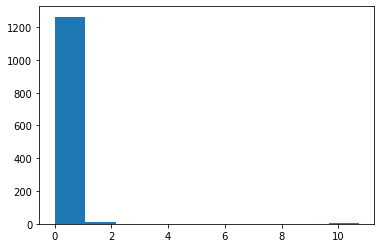

In [178]:
plt.hist(errs)
plt.show()

In [ ]:
# Fine, it's linear.

In [177]:
seqid = 1118

seqerr = []
    
for objid in range(n_objects[seqid-1]):
    X = np.array([ anno[seqid][i][objid] for i in range(1, 6)])
    
    n = np.arange(len(X)).reshape(-1,1)
    
    lr = LinearRegression()
    
    x = lr.fit(n, X[:,0]).predict(n)
    y = lr.fit(n, X[:,1]).predict(n)

    err_x = np.mean((x - X[:,0])**2)
    err_y = np.mean((y - X[:,1])**2)
    
    err = err_x + err_y
    
    seqerr.append(err)
    

seqerr = np.array(seqerr)
print('errs', seqerr)

errs [10.55665616]
1


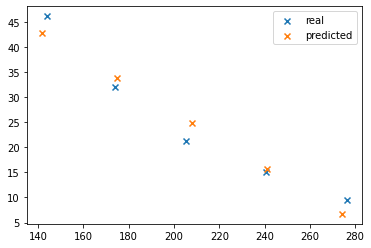

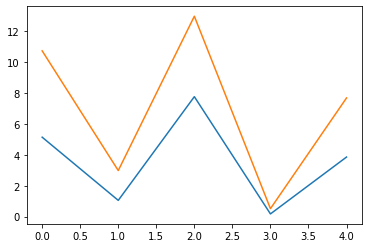

In [195]:
# Example of bad linear movement

seqid = 1118

X = np.array([ anno[seqid][i][0] for i in range(1, 6)])

n = np.arange(len(X)).reshape(-1,1)

x = LinearRegression().fit(n, X[:,0]).predict(n)
y = LinearRegression().fit(n, X[:,1]).predict(n)

err_x = (x - X[:,0])**2
err_y = (y - X[:,1])**2

plt.scatter(X[:,0], X[:,1], marker='x', label='real')
plt.scatter(x, y, marker='x', label='predicted')
plt.legend()
plt.show()

plt.plot(err_x)
plt.plot(err_y)
plt.show()